##convert

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/data.csv",encoding= 'unicode_escape')


In [3]:
df.shape

(541909, 8)

In [4]:
df = df.drop_duplicates()


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.shape

(536641, 8)

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [8]:
df.dropna(subset=['Description'], inplace=True)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133583
Country             0
dtype: int64

In [10]:
df.shape

(535187, 8)

In [11]:
data = df[["Description"]]


In [12]:
data

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN'S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


In [13]:
data.shape

(535187, 1)

In [14]:
data.isnull().sum()

Description    0
dtype: int64

In [15]:
# Replacing punctuations with space
data["Description"] = data["Description"].str.replace("[^a-zA-Z0-9]", " ")




<ipython-input-15-1d4c5ad6562b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Description"] = data["Description"].str.replace("[^a-zA-Z0-9]", " ")
<ipython-input-15-1d4c5ad6562b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Description"] = data["Description"].str.replace("[^a-zA-Z0-9]", " ")


In [16]:
data

,Description
0,WHITE HANGING HEART T LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART
...,...
541904,PACK OF 20 SPACEBOY NAPKINS
541905,CHILDREN S APRON DOLLY GIRL
541906,CHILDRENS CUTLERY DOLLY GIRL
541907,CHILDRENS CUTLERY CIRCUS PARADE


In [17]:
data["Description_edit"] = [row.lower() for row in data["Description"]]

<ipython-input-17-ec9857f1160c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Description_edit"] = [row.lower() for row in data["Description"]]


In [18]:
data

,Description,Description_edit
0,WHITE HANGING HEART T LIGHT HOLDER,white hanging heart t light holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART,red woolly hottie white heart
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,pack of 20 spaceboy napkins
541905,CHILDREN S APRON DOLLY GIRL,children s apron dolly girl
541906,CHILDRENS CUTLERY DOLLY GIRL,childrens cutlery dolly girl
541907,CHILDRENS CUTLERY CIRCUS PARADE,childrens cutlery circus parade


In [19]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# Making custom list of words to be removed
# add_words = ['movie','br','go','film','ugh','one','make','even','see','movies','get','makes','making','time','watch','character', 'like', 'good','well','would','really']

# # Adding to the list of words
# stop_words.extend(add_words)

# Function to remove stop words
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
data["Description_edit"] = [remove_stopwords(r) for r in data["Description_edit"]]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-19-29424e6c6dc2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Description_edit"] = [remove_stopwords(r) for r in data["Description_edit"]]


In [20]:
data

,Description,Description_edit
0,WHITE HANGING HEART T LIGHT HOLDER,white hanging heart light holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid hearts coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knitted union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART,red woolly hottie white heart
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,pack 20 spaceboy napkins
541905,CHILDREN S APRON DOLLY GIRL,children apron dolly girl
541906,CHILDRENS CUTLERY DOLLY GIRL,childrens cutlery dolly girl
541907,CHILDRENS CUTLERY CIRCUS PARADE,childrens cutlery circus parade


In [21]:
# Begin Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

data["Description_edit"] = data["Description_edit"].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-21-cf32091f165d>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Description_edit"] = data["Description_edit"].apply(lambda x: lemmatize_sentence(x))


In [22]:
# from nltk.stem import WordNetLemmatizer

# # Create an instance of the WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()

# # Define a function to lemmatize a sentence
# def lemmatize_sentence(sentence):
#     words = sentence.split()
#     lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
#     return ' '.join(lemmatized_words)

# # Apply lemmatization to the list of strings
# data["Description_edit"] = [lemmatize_sentence(desc) for desc in data["Description_edit"]]


In [23]:
data

,Description,Description_edit
0,WHITE HANGING HEART T LIGHT HOLDER,white hang heart light holder
1,WHITE METAL LANTERN,white metal lantern
2,CREAM CUPID HEARTS COAT HANGER,cream cupid heart coat hanger
3,KNITTED UNION FLAG HOT WATER BOTTLE,knit union flag hot water bottle
4,RED WOOLLY HOTTIE WHITE HEART,red woolly hottie white heart
...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,pack 20 spaceboy napkin
541905,CHILDREN S APRON DOLLY GIRL,child apron dolly girl
541906,CHILDRENS CUTLERY DOLLY GIRL,childrens cutlery dolly girl
541907,CHILDRENS CUTLERY CIRCUS PARADE,childrens cutlery circus parade


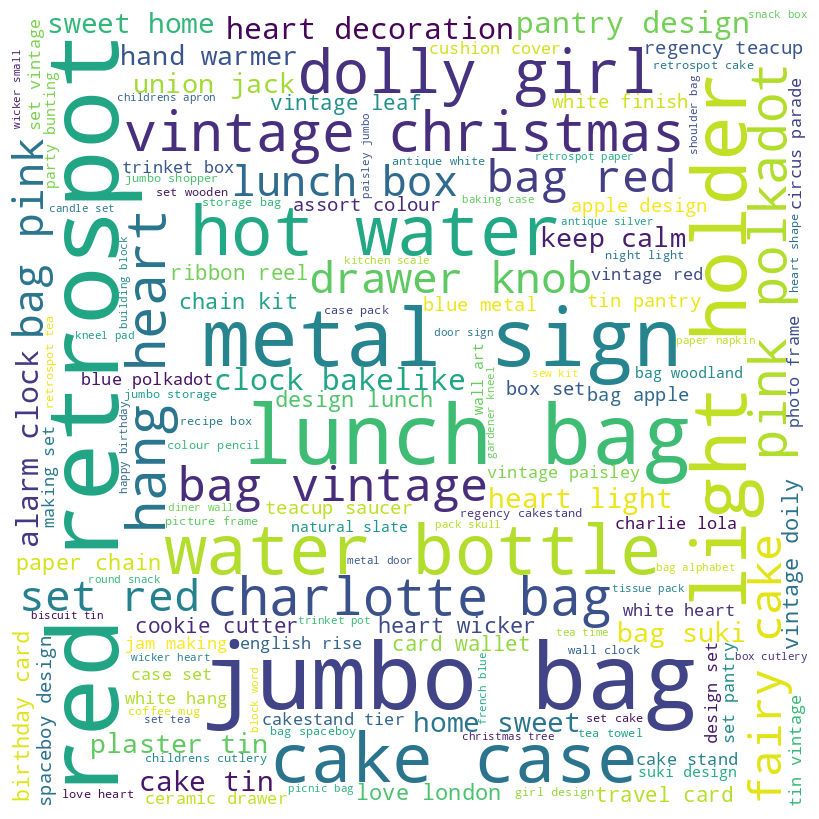

In [24]:
from wordcloud import WordCloud
# word_cloud_df = df.loc[df['sentiment'] == 'negative',:]
all_words = ' '.join([text for text in data["Description_edit"]])


wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization on the "Description_edit" column
tfidf_matrix = tfidf_vectorizer.fit_transform(data["Description_edit"])

# Standardize the data
scaler = StandardScaler()
tfidf_matrix_std = scaler.fit_transform(tfidf_matrix.toarray())

# Apply k-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(tfidf_matrix_std)

# Obtain cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the clustered data
plt.scatter(tfidf_matrix_std[labels == 0, 0], tfidf_matrix_std[labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(tfidf_matrix_std[labels == 1, 0], tfidf_matrix_std[labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of clustered data')
plt.show()

print(centroids)
print(labels)
print(kmeans.inertia_)



NameError: ignored

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler


# # Create an instance of TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer()

# # Apply TF-IDF vectorization on the "Description_edit" column
# tfidf_matrix = tfidf_vectorizer.fit_transform(data["Description_edit"])

# # scaler = StandardScaler()
# # X_std = scaler.fit_transform(tfidf_matrix) # standardise data
# from sklearn.cluster import KMeans
# km = KMeans(n_clusters=2) # applying k = 2
# km.fit(tfidf_matrix) # fit the data - identify pattern, does everything

# centroids = km.cluster_centers_ # final centroid points
# print(centroids)
# print(km.labels_) # measures how tight my groups are.
# print(km.inertia_)

# # # # # # #Plot the clustered data
# fig, ax = plt.subplots(figsize=(6, 6))
# plt.scatter(tfidf_matrix[km.labels_ == 0, 0], tfidf_matrix[km.labels_ == 0, 1],
#             c='green', label='cluster 1')
# plt.scatter(tfidf_matrix[km.labels_ == 1, 0],tfidf_matrix[km.labels_ == 1, 1],
#             c='blue', label='cluster 2')
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
#             c='red', label='centroid')
# plt.legend()
# plt.xlim([-2, 2])
# plt.ylim([-2, 2])
# plt.xlabel('Eruption time in mins')
# plt.ylabel('Waiting time to next eruption')
# plt.title('Visualization of clustered data', fontweight='bold')



# # # Apply k-means clustering
# # kmeans = KMeans(n_clusters=5)  # Specify the desired number of clusters
# # kmeans.fit(tfidf_matrix)

# # # Assign cluster labels to the data
# # data["ClusterLabel"] = kmeans.labels_

In [ ]:
# data = [str(desc) for desc in data]
# data = [desc.lower() for desc in data]

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans

# # Preprocess the text data
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# # Apply k-means clustering
# kmeans = KMeans(n_clusters=5)  # Specify the desired number of clusters
# kmeans.fit(tfidf_matrix)

# # Assign cluster labels to the data
# cluster_labels = kmeans.labels_



In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# # Apply dimensionality reduction with PCA
# pca = PCA(n_components=2)
# reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# # Create a scatter plot of the reduced features with cluster labels
# plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data["ClusterLabel"])
# plt.title('K-Means Clustering')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()

# # Print the cluster labels
# print(data["ClusterLabel"])
